# 01 – Exploration: Phishing Email Dataset

In this notebook we:
- load the raw phishing email dataset
- inspect its structure (rows, columns, dtypes)
- look at label distribution (spam vs legitimate)
- check basic missing values and simple statistics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Show plots inside the notebook
%matplotlib inline

# Path to the CSV
DATA_PATH = Path("../data/raw/CEAS_08.csv")

df = pd.read_csv(DATA_PATH, low_memory=False)
df.shape

(39154, 7)

In [2]:
# Show first 5 rows
df.head()

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


In [3]:
# Overview of columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [4]:
# Quick look at the column names
df.columns.tolist()

['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls']

In [5]:
# Count missing values per column
df.isna().sum().sort_values(ascending=False)

receiver    462
subject      28
sender        0
date          0
body          0
label         0
urls          0
dtype: int64

In [6]:
df['label'].value_counts()

label
1    21842
0    17312
Name: count, dtype: int64

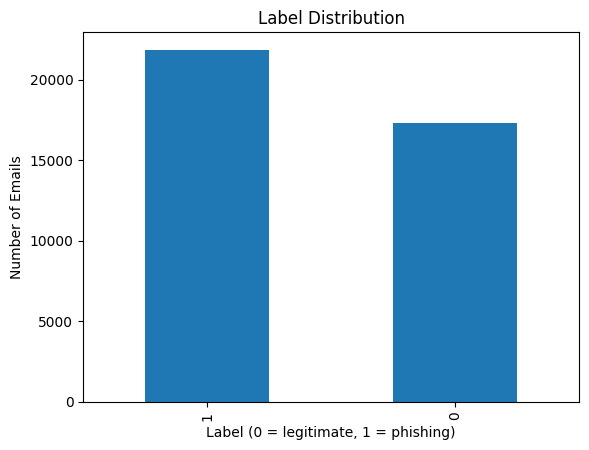

In [7]:
df['label'].value_counts().plot(kind='bar')
plt.title("Label Distribution")
plt.xlabel("Label (0 = legitimate, 1 = phishing)")
plt.ylabel("Number of Emails")
plt.show()

In [8]:
df['body_length'] = df['body'].str.len()

df['body_length'].describe()

count     39154.000000
mean       1571.079813
std        3615.810576
min          14.000000
25%         224.000000
50%         570.000000
75%        1643.000000
max      143996.000000
Name: body_length, dtype: float64

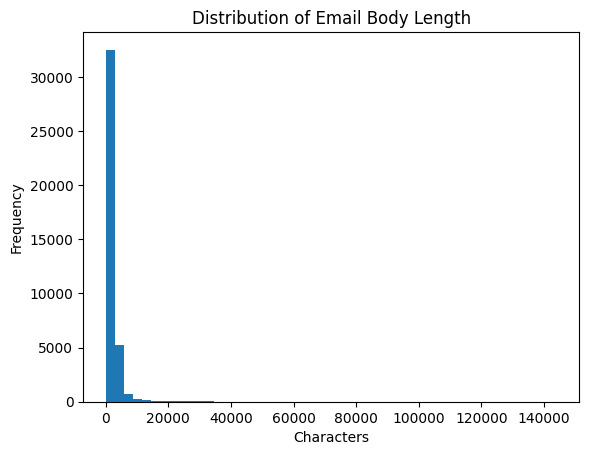

In [9]:
df['body_length'].plot(kind='hist', bins=50)
plt.title("Distribution of Email Body Length")
plt.xlabel("Characters")
plt.show()